# 🩸 Blood Donation Prediction System using Machine Learning

### Advanced Machine Learning Project

This project aims to build a predictive machine learning model that determines 
whether a donor is likely to donate blood based on historical donation data.


## 1️⃣ Import Required Libraries


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## 2️⃣ Load Dataset


In [4]:
df = pd.read_csv("blood.csv")
df.head()


,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,99,1
1,0,13,3250,28,1
2,1,17,4000,36,1
3,2,20,5000,45,1
4,1,24,6000,77,0


## 3️⃣ Dataset Overview


In [5]:
df.shape


(748, 5)

In [6]:
df.columns


Index(['Recency', 'Frequency', 'Monetary', 'Time', 'Class'], dtype='object')

In [7]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Class      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


,Recency,Frequency,Monetary,Time,Class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.516043,1378.676471,34.284759,0.237968
std,8.095396,5.841825,1459.826781,24.380307,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,99.000000,1.000000


## 4️⃣ Exploratory Data Analysis (EDA)
Understanding donor patterns and feature distributions.


In [8]:
df["Class"].value_counts()


Class
0    570
1    178
Name: count, dtype: int64

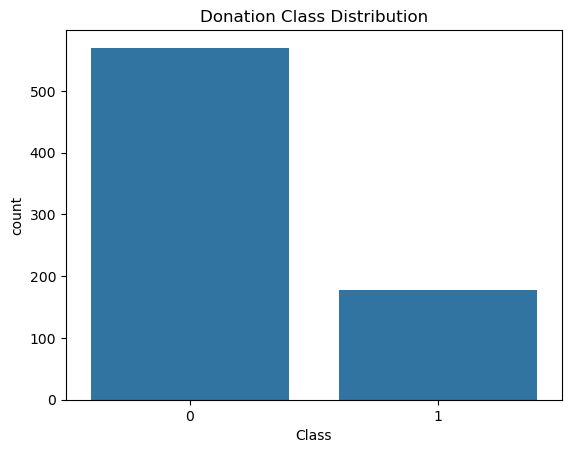

In [9]:
sns.countplot(x="Class", data=df)
plt.title("Donation Class Distribution")
plt.show()


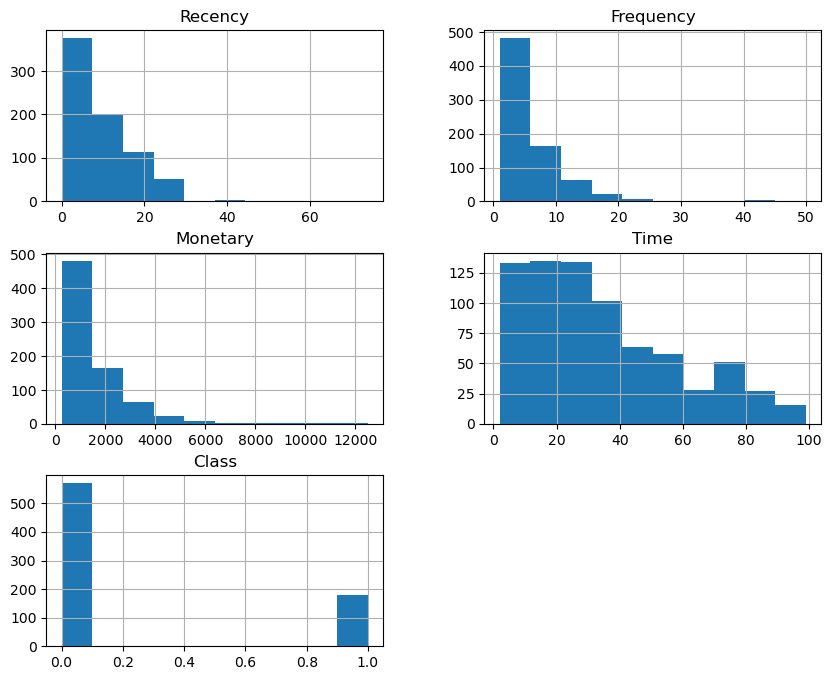

In [12]:
df.hist(figsize=(10,8))
plt.show()


## 5️⃣ Feature Selection
Separating input features and target variable.


In [13]:
X = df.drop("Class", axis=1)
y = df["Class"]

X.head()


,Recency,Frequency,Monetary,Time
0,2,50,12500,99
1,0,13,3250,28
2,1,17,4000,36
3,2,20,5000,45
4,1,24,6000,77


## 6️⃣ Train-Test Split
Splitting dataset for model training and evaluation.


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training Data:", X_train.shape)
print("Testing Data:", X_test.shape)


Training Data: (598, 4)
Testing Data: (150, 4)


## 7️⃣ Data Preprocessing & Model Pipeline
Applying feature scaling and Random Forest classification.


In [17]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier(
        n_estimators=300,
        max_depth=7,
        random_state=42
    ))
])


## 8️⃣ Model Training


In [18]:
pipeline.fit(X_train, y_train)


,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,300
,criterion,'gini'
,max_depth,7
,min_samples_split,2


## 9️⃣ Model Evaluation
Analyzing prediction performance using classification metrics.


In [19]:
y_pred = pipeline.predict(X_test)

accuracy_score(y_test, y_pred)


0.7733333333333333

In [20]:
confusion_matrix(y_test, y_pred)


array([[102,  11],
       [ 23,  14]])

In [21]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.90      0.86       113
           1       0.56      0.38      0.45        37

    accuracy                           0.77       150
   macro avg       0.69      0.64      0.65       150
weighted avg       0.75      0.77      0.76       150



## 🔟 Prediction System
Testing model on new donor data.


In [22]:
new_donor = pd.DataFrame({
    "Recency": [2],
    "Frequency": [15],
    "Monetary": [3000],
    "Time": [24]
})

prediction = pipeline.predict(new_donor)[0]

if prediction == 1:
    print("✅ Likely to Donate Blood")
else:
    print("❌ Unlikely to Donate Blood")


✅ Likely to Donate Blood


## ✅ Conclusion

The machine learning model successfully predicts donor behavior based on 
historical donation attributes. This system can assist blood banks in 
optimizing donor engagement strategies and improving blood supply management.
